In [16]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv('Clean_BA_reviews_v2.csv')
df.head()

,reviews,clean_reviews
0,✅ Trip Verified | Check in fast and friendly....,check fast friendly security breeze lounge bus...
1,✅ Trip Verified | This is the first time I ha...,first time see new club world suite seat comfo...
2,✅ Trip Verified | Flew business class from Do...,flew business class doha london 31st march ser...
3,✅ Trip Verified | Starting off at Heathrow Te...,start heathrow terminal 3 check fairly easy fa...
4,Not Verified | We have flown this route with ...,flown route easyjet regularly twenty year age ...


### Word Cloud

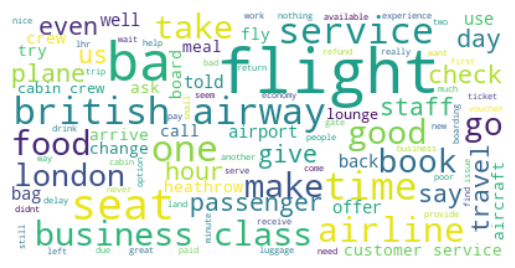

In [19]:
# Testing
text_cloud = ' '.join(df['clean_reviews'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate(text_cloud)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sentiment Analysis

In [4]:
from textblob import TextBlob

In [6]:
text_1 = df['clean_reviews'][0]
text_2 = df['clean_reviews'][1]

p_1 = TextBlob(text_1).sentiment.polarity
p_2 = TextBlob(text_2).sentiment.polarity

s_1 = TextBlob(text_1).sentiment.subjectivity
s_2 = TextBlob(text_2).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
print("Polarity of Text 2 is", p_2)
print("Subjectivity of Text 1 is", s_1)
print("Subjectivity of Text 2 is", s_2)

Polarity of Text 1 is 0.29551282051282046
Polarity of Text 2 is 0.01997245179063362
Subjectivity of Text 1 is 0.5897435897435896
Subjectivity of Text 2 is 0.4488980716253444


In [7]:
# Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)

print('sentiment of text 1: ', sent_1)
print('sentiment of text 2: ', sent_2)

sentiment of text 1:  {'neg': 0.068, 'neu': 0.504, 'pos': 0.428, 'compound': 0.9694}
sentiment of text 2:  {'neg': 0.115, 'neu': 0.721, 'pos': 0.164, 'compound': 0.7984}


In [25]:
## Transformer Pipeline
from transformers import pipeline

In [28]:
classifier = pipeline("text-classification",model="distilbert-base-uncased-finetuned-sst-2-english")

batch_size = 32

sentiments = []
for i in range(0, 1000, batch_size):
    batch_reviews = df['clean_reviews'].iloc[i:i+batch_size].to_list()
    batch_results = classifier(batch_reviews)
    for result, review in zip(batch_results, batch_reviews):
        sentiments.append({'Review': review, 'Sentiment': result['label']})
        
df_sentiments = pd.DataFrame(sentiments)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [29]:
df_sentiments.head()

,Review,Sentiment
0,check fast friendly security breeze lounge bus...,POSITIVE
1,first time see new club world suite seat comfo...,NEGATIVE
2,flew business class doha london 31st march ser...,NEGATIVE
3,start heathrow terminal 3 check fairly easy fa...,POSITIVE
4,flown route easyjet regularly twenty year age ...,NEGATIVE


In [31]:
df_sentiments.to_csv('sentiment_result_vDistilbert.csv')